In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('train_preprocess.csv')
data

,sentence,fuel,machine,others,part,price,service
0,Saya memakai Honda Jazz GK5 tahun 2014 ( perta...,neutral,neutral,positive,neutral,neutral,neutral
1,Avanza kenapa jadi boros bensin begini dah ah....,negative,neutral,neutral,neutral,neutral,neutral
2,"saran ku dan pengalaman ku , mending beli mobi...",positive,positive,neutral,neutral,neutral,neutral
3,Dari segi harga juga pajero lebih mahal 30 jut...,neutral,neutral,neutral,neutral,positive,neutral
4,Kalo menurut gw enak pajero si,neutral,neutral,positive,neutral,neutral,neutral
...,...,...,...,...,...,...,...
805,Naik pajero goyang nya parah mending naik inova,neutral,neutral,positive,neutral,neutral,neutral
806,pengalaman berkendara nya sangat menyenangkan ...,neutral,positive,neutral,neutral,neutral,neutral
807,"agya agak sedikit mengecewakan, gak bagus",neutral,neutral,negative,neutral,neutral,neutral
808,Di samping harga nya yang terjangkau motor mat...,positive,neutral,positive,neutral,positive,neutral


Lest do data cleaning

In [4]:
import string
import re

In [5]:
def dataclean(text):
  text = re.sub("https?://\S+|www\.\S+","",text) # remove any links
  text = re.sub("<.*?>+","",text) # remove any symbol except alpha numeric
  text = re.sub("[%s]"% re.escape(string.punctuation),"",text) # remove space
  text = re.sub("\n","",text) # remove enter
  text = re.sub("\w*\d\w*","",text) # remove any number inside text
  text = text.lower()
  return text

data['sentence'] = data['sentence'].apply(dataclean)
data

,sentence,fuel,machine,others,part,price,service
0,saya memakai honda jazz tahun pertama melun...,neutral,neutral,positive,neutral,neutral,neutral
1,avanza kenapa jadi boros bensin begini dah ah ...,negative,neutral,neutral,neutral,neutral,neutral
2,saran ku dan pengalaman ku mending beli mobil...,positive,positive,neutral,neutral,neutral,neutral
3,dari segi harga juga pajero lebih mahal jutaa...,neutral,neutral,neutral,neutral,positive,neutral
4,kalo menurut gw enak pajero si,neutral,neutral,positive,neutral,neutral,neutral
...,...,...,...,...,...,...,...
805,naik pajero goyang nya parah mending naik inova,neutral,neutral,positive,neutral,neutral,neutral
806,pengalaman berkendara nya sangat menyenangkan ...,neutral,positive,neutral,neutral,neutral,neutral
807,agya agak sedikit mengecewakan gak bagus,neutral,neutral,negative,neutral,neutral,neutral
808,di samping harga nya yang terjangkau motor mat...,positive,neutral,positive,neutral,positive,neutral


Next lets encode the sentimen

In [6]:
%pip install sastrawi

In [7]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [8]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
factory2 = StopWordRemoverFactory()
stopword_remover = factory2.create_stop_word_remover()
def stem_text(text):
  text = stemmer.stem(text)
  text = stopword_remover.remove(text)
  return text
data['sentence'] = data['sentence'].apply(stem_text)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label = LabelEncoder()
data['fuel'] = label.fit_transform(data[['fuel']])
data['machine'] = label.fit_transform(data[['machine']])
data['others'] = label.fit_transform(data[['others']])
data['part'] = label.fit_transform(data[['part']])
data['price'] = label.fit_transform(data[['price']])
data['service'] = label.fit_transform(data[['service']])
data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,sentence,fuel,machine,others,part,price,service
0,pakai honda jazz tahun pertama luncur mobil ny...,1,1,2,1,1,1
1,avanza jadi boros bensin begini dah ah baru is...,0,1,1,1,1,1
2,saran ku alam ku mending beli mobil niaga cant...,2,2,1,1,1,1
3,segi harga pajero lebih mahal juta banding for...,1,1,1,1,2,1
4,kalo turut gw enak pajero si,1,1,2,1,1,1
...,...,...,...,...,...,...,...
805,naik pajero goyang nya parah mending naik inova,1,1,2,1,1,1
806,alam kendara nya sangat senang pakai avanza su...,1,2,1,1,1,1
807,agya sedikit kecewa gak bagus,1,1,0,1,1,1
808,samping harga nya jangkau motor matic vario ir...,2,1,2,1,2,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  810 non-null    object
 1   fuel      810 non-null    int64 
 2   machine   810 non-null    int64 
 3   others    810 non-null    int64 
 4   part      810 non-null    int64 
 5   price     810 non-null    int64 
 6   service   810 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 44.4+ KB


Since there are 6 diffarent attribute needed to be predicted, the datathen divided into 6 different dataframe. By doing this, we can focusing the meaning of sentence to the level that the computer can understand the meaning of the word based on each attribute.

In [12]:
data_fuel = pd.DataFrame(data[['sentence','fuel']])
data_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  810 non-null    object
 1   fuel      810 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [13]:
data_machine = pd.DataFrame(data[['sentence','machine']])
data_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  810 non-null    object
 1   machine   810 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [14]:
data_other = pd.DataFrame(data[['sentence','others']])
data_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  810 non-null    object
 1   others    810 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [15]:
data_part = pd.DataFrame(data[['sentence','part']])
data_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  810 non-null    object
 1   part      810 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [16]:
data_price = pd.DataFrame(data[['sentence','price']])
data_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  810 non-null    object
 1   price     810 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


In [17]:
data_service = pd.DataFrame(data[['sentence','service']])
data_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  810 non-null    object
 1   service   810 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


Next, we count each type of sentimen. Then do resample to make each type has same count. This will help program to understand more for each sentence so each work can have better weight distribution

In [18]:
import matplotlib.pyplot as plt
from sklearn.utils import resample

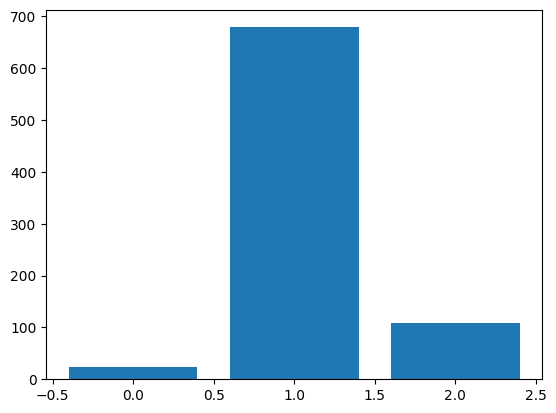

In [19]:
count = data_fuel.groupby('fuel')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

In [20]:
sentence = data_fuel.groupby('fuel')
resample_list = []

for sentence, sentimen in sentence:
  resample_group = resample(sentimen,replace=True, random_state=0,n_samples=700)
  resample_list.append(resample_group)

data_fuel = pd.concat(resample_list)
data_fuel

,sentence,fuel
418,masa konsumsi bensin toyota avanza veloz liter...,0
499,grand livina xv at ngelitik nya parah kak seka...,0
641,livina tempat gue bensin nya asli boros banget...,0
1,avanza jadi boros bensin begini dah ah baru is...,0
116,rush konde konsumsi bbm tetap irit,0
...,...,...
45,vario sangat ringan nyaman pakai perempuan say...,2
220,pakai grand livina km udah hampir ribu nyamann...,2
45,vario sangat ringan nyaman pakai perempuan say...,2
496,suzuki karimun gx hanya bandel milik kabin lua...,2


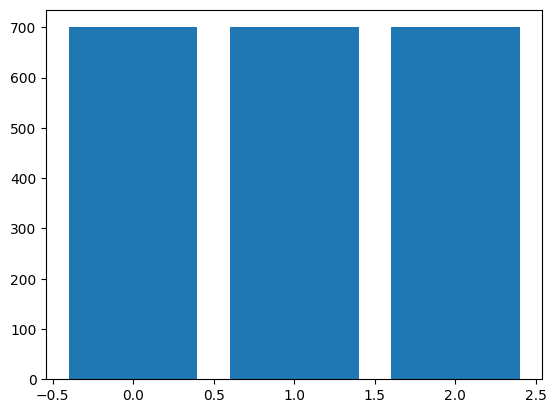

In [21]:
count = data_fuel.groupby('fuel')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

The data show same number of data each sentimen. Lets do this to the other 5 dataframe


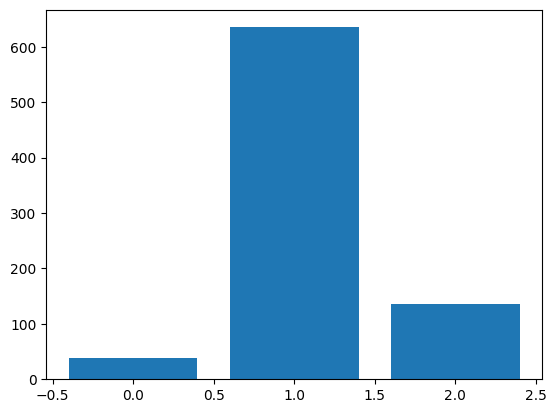

In [22]:
count = data_machine.groupby('machine')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

In [23]:
sentence = data_machine.groupby('machine')
resample_list = []

for sentence, sentimen in sentence:
  resample_group = resample(sentimen,replace=True, random_state=0,n_samples=700)
  resample_list.append(resample_group)

data_machine = pd.concat(resample_list)
data_machine

,sentence,machine
53,wuling formo mobil cina mesin nya enggak umur ...,0
101,soal tenaga kurang ertiga agak ganggu,0
101,soal tenaga kurang ertiga agak ganggu,0
226,satu yang mungkin rasa kurang xenia ialah beba...,0
403,jazz tari nya lebih oke brio,0
...,...,...
507,mesin bandel irit jadi alas banyak keluarga in...,2
256,avanza lari nya lumayan kencang tol capai km h,2
680,avanza manuver lincah mesin nya,2
515,awal nya beli motor tahun alhamdulillah sekara...,2


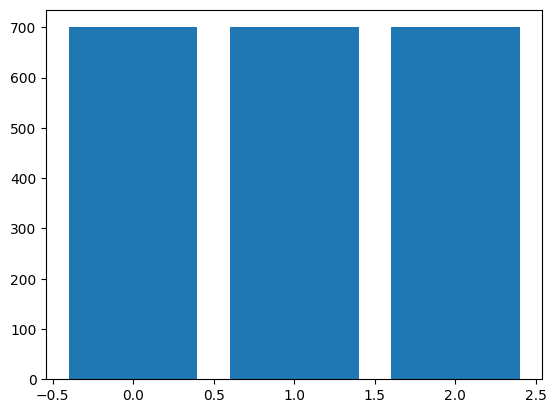

In [24]:
count = data_machine.groupby('machine')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

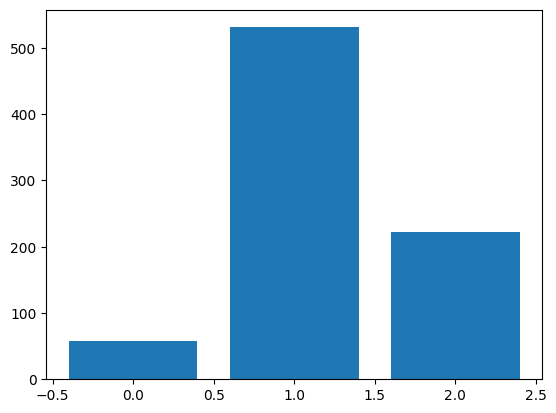

In [25]:
count = data_other.groupby('others')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

In [26]:
sentence = data_other.groupby('others')
resample_list = []

for sentence, sentimen in sentence:
  resample_group = resample(sentimen,replace=True, random_state=0,n_samples=600)
  resample_list.append(resample_group)

data_other = pd.concat(resample_list)
data_other

,sentence,others
633,wah kayak nya si wuling formo kurang yakin bua...,0
664,gue pakai hrv dan udah tahun jujur enggak suka...,0
777,jazz jauh lebih praktis dipake kalo banding brio,0
19,punya mobil altis awet baru tahun rusak,0
49,xenia gak awet banget masa baru bulan masalah,0
...,...,...
395,senang gue sama xenia li keluar duit enggak ba...,2
347,wuling confero mobil sangat cocok pergi jauh,2
304,selalu senang tiap kendara aerox,2
343,tahun lebih toyota calya pakai tempattempat ek...,2


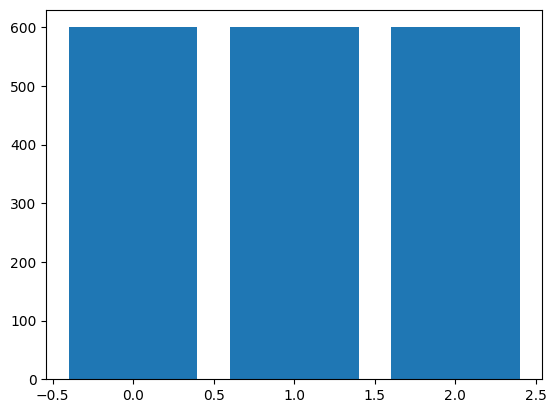

In [27]:
count = data_other.groupby('others')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

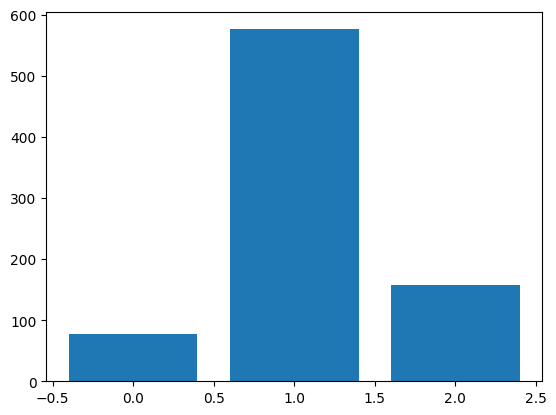

In [28]:
count = data_part.groupby('part')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

In [29]:
sentence = data_part.groupby('part')
resample_list = []

for sentence, sentimen in sentence:
  resample_group = resample(sentimen,replace=True, random_state=0,n_samples=600)
  resample_list.append(resample_group)

data_part = pd.concat(resample_list)
data_part

,sentence,part
436,vario body nya lebih kokoh mio,0
465,kalau segi desain mah veloz juara nya avanza l...,0
611,xpander bodi kaleng siapa bilang rush doang yg...,0
645,kalau rush banyak jeroan nya jadi berat stabil,0
645,kalau rush banyak jeroan nya jadi berat stabil,0
...,...,...
640,gue lebih milih honda minim awat suku cadang a...,2
115,mending vrz sekali fitur lengkap spoiler beli ...,2
250,suzuki ertiga mobil murah tidak murah lihat in...,2
162,langsung kagum bgt nyaman nya mulai kedap nya ...,2


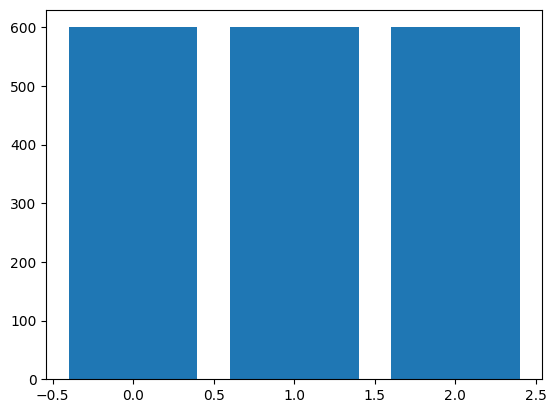

In [30]:
count = data_part.groupby('part')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

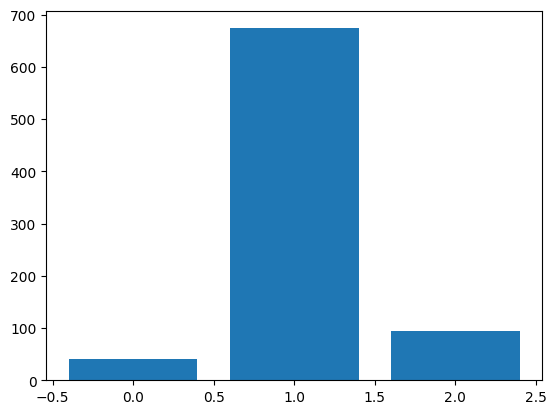

In [31]:
count = data_price.groupby('price')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

In [32]:
sentence = data_price.groupby('price')
resample_list = []

for sentence, sentimen in sentence:
  resample_group = resample(sentimen,replace=True, random_state=0,n_samples=700)
  resample_list.append(resample_group)

data_price = pd.concat(resample_list)
data_price

,sentence,price
7,mending confero harga nya lebih murah formo,0
32,begitu nissan memang mahal daya tahan nya bagus,0
32,begitu nissan memang mahal daya tahan nya bagus,0
746,jazz enak mahal harga awat gila,0
135,baca atas tetangga xenia naik sekitar juta mak...,0
...,...,...
294,mending wuiling almaz fitur banyak mesin turbo...,2
310,saya bangga punya karimun wagon r mobil sangat...,2
754,mending calya harga stabil,2
260,mobilio bagus purnajual oke,2


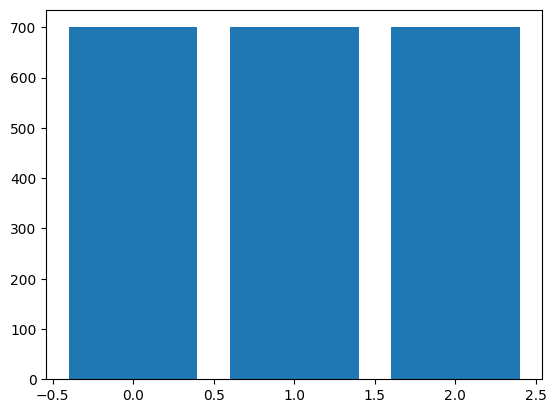

In [33]:
count = data_price.groupby('price')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

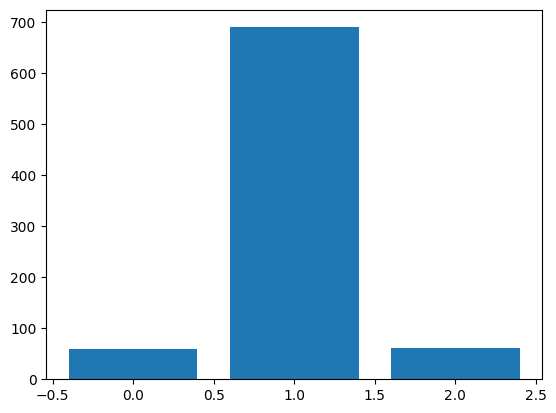

In [34]:
count = data_service.groupby('service')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

In [35]:
sentence = data_service.groupby('service')
resample_list = []

for sentence, sentimen in sentence:
  resample_group = resample(sentimen,replace=True, random_state=0,n_samples=700)
  resample_list.append(resample_group)

data_service = pd.concat(resample_list)
data_service

,sentence,service
610,mitsubishiid bengkel matraman kurang bagus ser...,0
637,hmm layan nya not recommended lah lebih bagus ...,0
731,bengkel resmi yamaha jual suku cadang harga ja...,0
21,service rutin bengkel daihatsu resmi gak jamin...,0
50,lama banget nunggu inden xpander keburu jual m...,0
...,...,...
693,xenia saya pakai ini biaya awat rendah andal m...,2
114,pertama kali milik mobil rasa mimpi telah mobi...,2
371,salah satu saya suka yamaha after sales servic...,2
640,gue lebih milih honda minim awat suku cadang a...,2


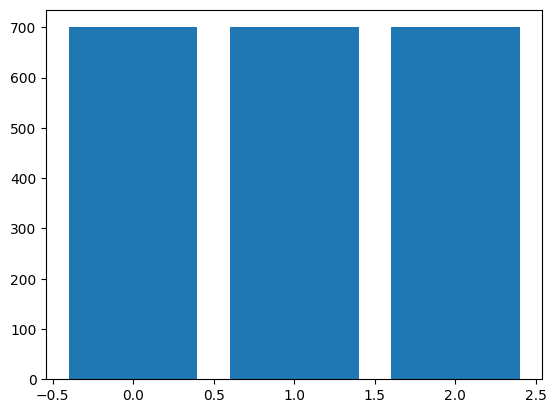

In [36]:
count = data_service.groupby('service')['sentence'].count()
plt.bar(count.index,count.values)
plt.show()

Now, the data is ready to be trained into the model

In [111]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [38]:
tokenizer_dasar = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
model_dasar = BertModel.from_pretrained("indobenchmark/indobert-base-p2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [39]:
def process_text(text, model=model_dasar, tokenizer=tokenizer_dasar):

    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state
        logits = embeddings.mean(dim=1)

    return logits.squeeze(0)

In [40]:
data_fuel['embedded'] = data_fuel['sentence'].apply(process_text)
data_fuel['embedded'] = data_fuel['embedded'].apply(lambda x: x.numpy())

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [41]:
x_train,xtemp,y_train,ytemp = train_test_split(np.array(data_fuel['embedded'].tolist()),np.array(data_fuel['fuel'].tolist()),test_size=0.2,random_state=42)
x_val,x_test_fuel,y_val,y_test_fuel = train_test_split(xtemp,ytemp,test_size=0.5,random_state=42)

In [42]:
def create_model(input_size, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_size)))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [43]:
num_classes = 3
input_size = x_train[0].shape
model_fuel = create_model(input_size, num_classes)
model_fuel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_fuel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │           2,307 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
num_epochs = 10
batch_size = 256
history_fuel = model_fuel.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val,y_val))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3004 - loss: 1.5302 - val_accuracy: 0.3143 - val_loss: 1.1866
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3430 - loss: 1.1375 - val_accuracy: 0.5667 - val_loss: 0.8905
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6339 - loss: 0.8424 - val_accuracy: 0.7048 - val_loss: 0.7365
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7503 - loss: 0.6985 - val_accuracy: 0.7952 - val_loss: 0.6074
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8221 - loss: 0.5726 - val_accuracy: 0.8476 - val_loss: 0.5195
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8835 - loss: 0.4768 - val_accuracy: 0.8905 - val_loss: 0.4525
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8985 - loss: 0.4242 - val_accuracy: 0.9048 - val_loss: 0.3988
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9176 - loss: 0.3748 - val_accuracy: 0.9381 - val_loss: 0.3600


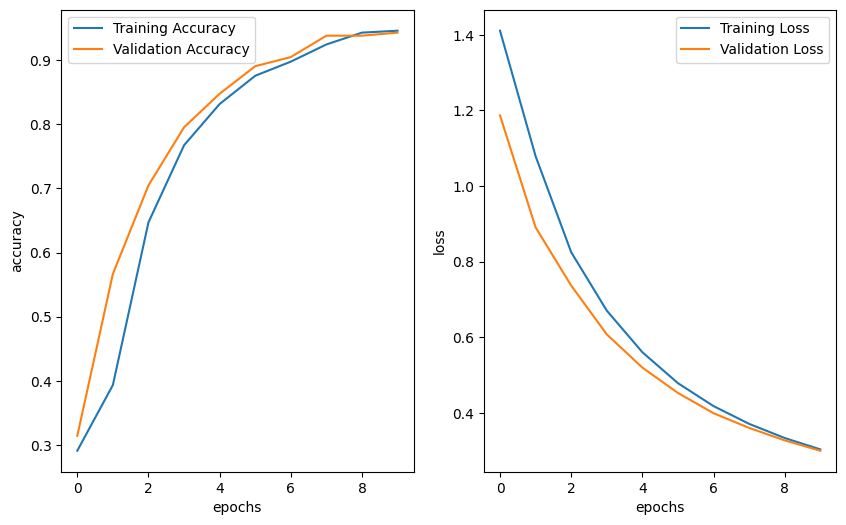

In [45]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history_fuel.history['accuracy'], label ='Training Accuracy')
plt.plot(history_fuel.history['val_accuracy'], label ='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_fuel.history['loss'], label ='Training Loss')
plt.plot(history_fuel.history['val_loss'], label ='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [46]:
data_machine['embedded'] = data_machine['sentence'].apply(process_text)
data_machine['embedded'] = data_machine['embedded'].apply(lambda x: x.numpy())

In [47]:
x_train,xtemp,y_train,ytemp = train_test_split(np.array(data_machine['embedded'].tolist()),np.array(data_machine['machine'].tolist()),test_size=0.2,random_state=42)
x_val,x_test_machine,y_val,y_test_machine = train_test_split(xtemp,ytemp,test_size=0.5,random_state=42)

In [48]:
num_classes = 3
input_size = x_train[0].shape
model_machine = create_model(input_size, num_classes)
model_machine.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_machine.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3)                   │           2,307 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
num_epochs = 10
batch_size = 128
history_machine = model_machine.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val,y_val))

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3559 - loss: 1.2395 - val_accuracy: 0.5619 - val_loss: 0.9728
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5896 - loss: 0.9062 - val_accuracy: 0.6238 - val_loss: 0.8110
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6998 - loss: 0.7544 - val_accuracy: 0.7333 - val_loss: 0.6765
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7845 - loss: 0.6244 - val_accuracy: 0.7714 - val_loss: 0.6082
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8206 - loss: 0.5539 - val_accuracy: 0.7810 - val_loss: 0.5595
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8372 - loss: 0.4934 - val_accuracy: 0.8286 - val_loss: 0.5216
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8400 - loss: 0.4883 - val_accuracy: 0.8190 - val_loss: 0.4928
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8574 - loss: 0.4420 - val_accuracy: 0.8524 - val_loss

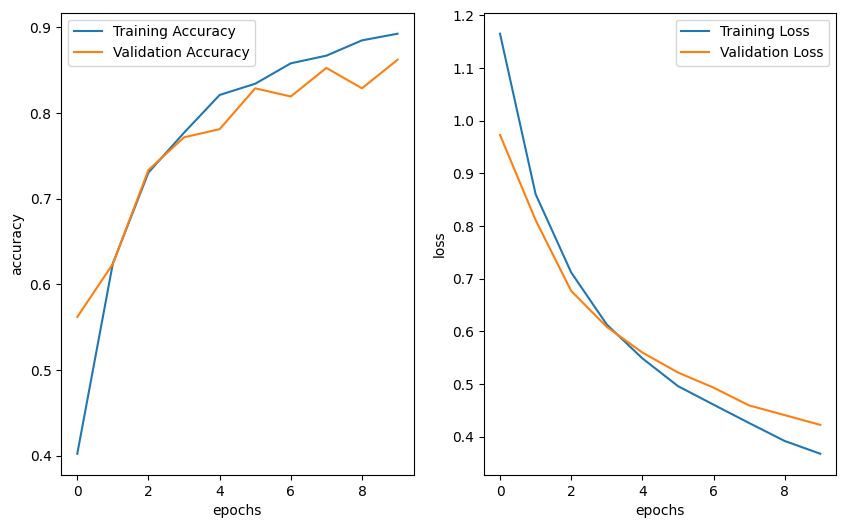

In [50]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history_machine.history['accuracy'], label ='Training Accuracy')
plt.plot(history_machine.history['val_accuracy'], label ='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_machine.history['loss'], label ='Training Loss')
plt.plot(history_machine.history['val_loss'], label ='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [51]:
data_other['embedded'] = data_other['sentence'].apply(process_text)
data_other['embedded'] = data_other['embedded'].apply(lambda x: x.numpy())

In [112]:
x_train,xtemp,y_train,ytemp = train_test_split(np.array(data_other['embedded'].tolist()),np.array(data_other['others'].tolist()),test_size=0.2,random_state=42)
x_val,x_test_other,y_val,y_test_other = train_test_split(xtemp,ytemp,test_size=0.5,random_state=42)

In [179]:
num_classes = 3
input_size = x_train[0].shape
model_other = create_model(input_size, num_classes)
optimizer = Adam(learning_rate=0.001, weight_decay=0.001)
model_other.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_other.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 3)                   │           2,307 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
num_epochs = 20
batch_size = 256
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=1)
history_other = model_other.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val,y_val), callbacks=[lr_reducer])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.2921 - loss: 1.2905 - val_accuracy: 0.3889 - val_loss: 1.1801 - learning_rate: 0.0010
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4573 - loss: 1.0772 - val_accuracy: 0.4889 - val_loss: 1.0031 - learning_rate: 0.0010
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5627 - loss: 0.9343 - val_accuracy: 0.6056 - val_loss: 0.9013 - learning_rate: 0.0010
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6271 - loss: 0.8380 - val_accuracy: 0.6389 - val_loss: 0.8378 - learning_rate: 0.0010
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6870 - loss: 0.7739 - val_accuracy: 0.6611 - val_loss: 0.7778 - learning_rate: 0.0010
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7217 - loss: 0.7178 - val_accuracy: 0.6889 - val_loss: 0.7412 - learning_rate: 0.0010
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7239 - loss: 0.7017 - val_accuracy: 0.7056 

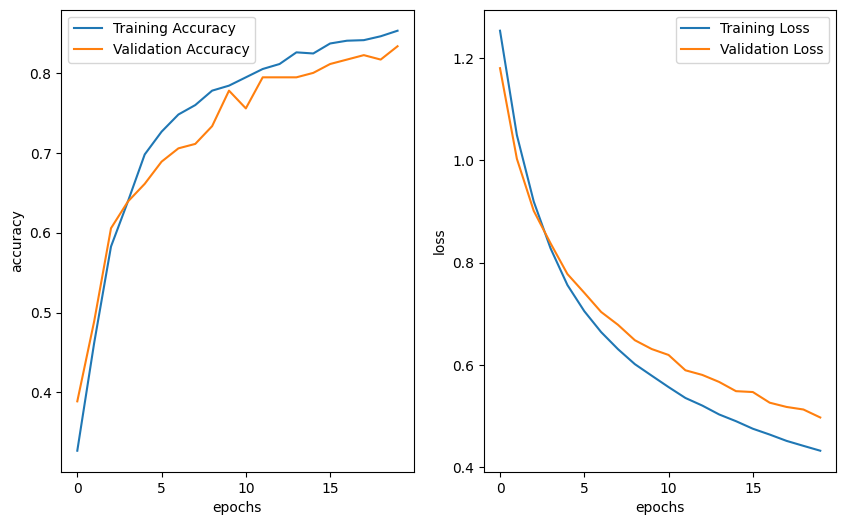

In [181]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history_other.history['accuracy'], label ='Training Accuracy')
plt.plot(history_other.history['val_accuracy'], label ='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_other.history['loss'], label ='Training Loss')
plt.plot(history_other.history['val_loss'], label ='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [56]:
data_part['embedded'] = data_part['sentence'].apply(process_text)
data_part['embedded'] = data_part['embedded'].apply(lambda x: x.numpy())

In [77]:
x_train,xtemp,y_train,ytemp = train_test_split(np.array(data_part['embedded'].tolist()),np.array(data_part['part'].tolist()),test_size=0.2,random_state=42)
x_val,x_test_part,y_val,y_test_part = train_test_split(xtemp,ytemp,test_size=0.5,random_state=42)

In [84]:
num_classes = 3
input_size = x_train[0].shape
model_part = create_model(input_size, num_classes)
model_part.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_part.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 3)                   │           2,307 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
num_epochs = 15
batch_size = 256
history_part = model_part.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val,y_val))

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3773 - loss: 1.2831 - val_accuracy: 0.4000 - val_loss: 1.0512
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4733 - loss: 1.0177 - val_accuracy: 0.5611 - val_loss: 0.8827
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5968 - loss: 0.8841 - val_accuracy: 0.6278 - val_loss: 0.8122
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6515 - loss: 0.8005 - val_accuracy: 0.6833 - val_loss: 0.7365
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6712 - loss: 0.7312 - val_accuracy: 0.6944 - val_loss: 0.6770
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7096 - loss: 0.6643 - val_accuracy: 0.7444 - val_loss: 0.6427
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7434 - loss: 0.6219 - val_accuracy: 0.7722 - val_loss: 0.6047
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7759 - loss: 0.5832 - val_accuracy: 0.7778 - val_loss: 0.5728
Epoch 

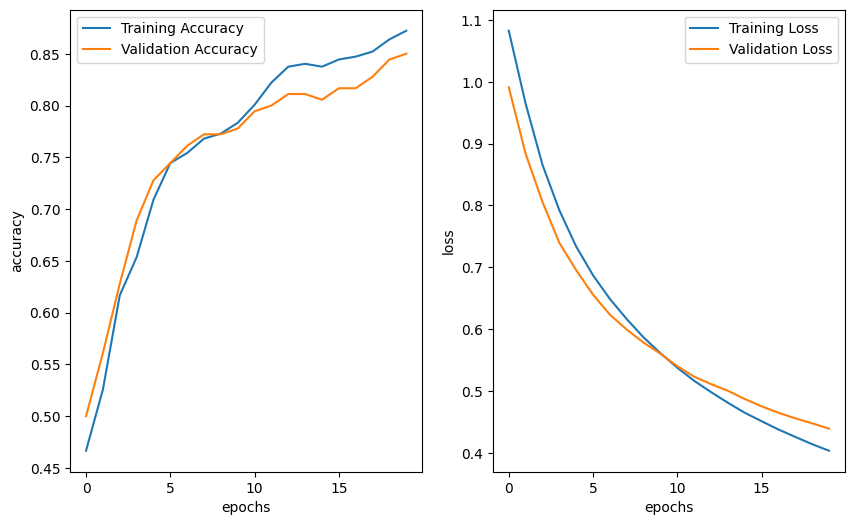

In [83]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history_part.history['accuracy'], label ='Training Accuracy')
plt.plot(history_part.history['val_accuracy'], label ='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_part.history['loss'], label ='Training Loss')
plt.plot(history_part.history['val_loss'], label ='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [61]:
data_price['embedded'] = data_price['sentence'].apply(process_text)
data_price['embedded'] = data_price['embedded'].apply(lambda x: x.numpy())

In [62]:
x_train,xtemp,y_train,ytemp = train_test_split(np.array(data_price['embedded'].tolist()),np.array(data_price['price'].tolist()),test_size=0.2,random_state=42)
x_val,x_test_price,y_val,y_test_price = train_test_split(xtemp,ytemp,test_size=0.5,random_state=42)

In [63]:
num_classes = 3
input_size = x_train[0].shape
model_price = create_model(input_size, num_classes)
model_price.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_price.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 3)                   │           2,307 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
num_epochs = 10
batch_size = 256
history_price = model_price.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val,y_val))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2788 - loss: 1.3932 - val_accuracy: 0.4048 - val_loss: 1.0626
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4886 - loss: 1.0214 - val_accuracy: 0.6286 - val_loss: 0.8434
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6639 - loss: 0.8093 - val_accuracy: 0.7238 - val_loss: 0.6959
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7579 - loss: 0.6633 - val_accuracy: 0.7571 - val_loss: 0.6034
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7960 - loss: 0.5686 - val_accuracy: 0.7952 - val_loss: 0.5371
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8360 - loss: 0.5055 - val_accuracy: 0.8333 - val_loss: 0.4833
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8694 - loss: 0.4520 - val_accuracy: 0.8524 - val_loss: 0.4515
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8747 - loss: 0.4203 - val_accuracy: 0.8714 - val_loss: 0.4119
Epoch 9

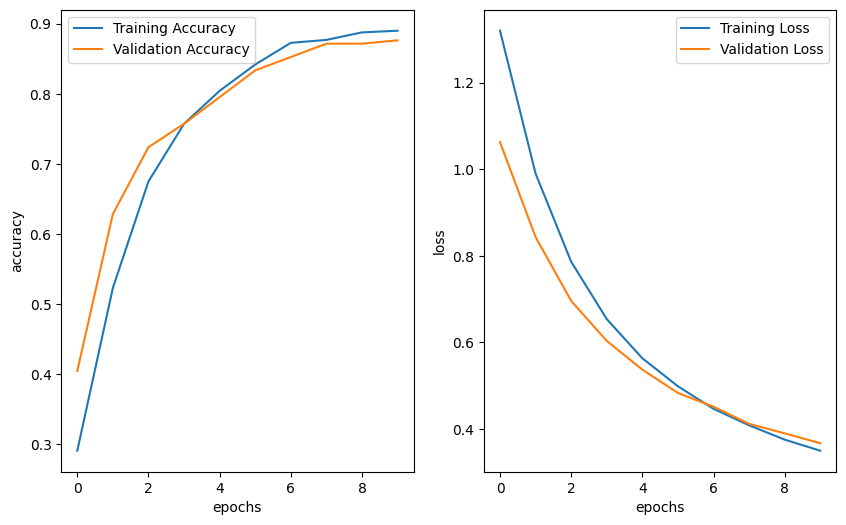

In [65]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history_price.history['accuracy'], label ='Training Accuracy')
plt.plot(history_price.history['val_accuracy'], label ='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_price.history['loss'], label ='Training Loss')
plt.plot(history_price.history['val_loss'], label ='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [66]:
data_service['embedded'] = data_service['sentence'].apply(process_text)
data_service['embedded'] = data_service['embedded'].apply(lambda x: x.numpy())

In [67]:
x_train,xtemp,y_train,ytemp = train_test_split(np.array(data_service['embedded'].tolist()),np.array(data_service['service'].tolist()),test_size=0.2,random_state=42)
x_val,x_test_service,y_val,y_test_service = train_test_split(xtemp,ytemp,test_size=0.5,random_state=42)

In [68]:
num_classes = 3
input_size = x_train[0].shape
model_service = create_model(input_size, num_classes)
model_service.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_service.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 3)                   │           2,307 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
num_epochs = 15
batch_size = 128
history_service = model_service.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val,y_val))

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3777 - loss: 1.2513 - val_accuracy: 0.6381 - val_loss: 0.8188
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6953 - loss: 0.7213 - val_accuracy: 0.8000 - val_loss: 0.5664
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8294 - loss: 0.4913 - val_accuracy: 0.8476 - val_loss: 0.4491
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8878 - loss: 0.4063 - val_accuracy: 0.9000 - val_loss: 0.3819
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9098 - loss: 0.3492 - val_accuracy: 0.9190 - val_loss: 0.3291
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9255 - loss: 0.2968 - val_accuracy: 0.9381 - val_loss: 0.2913
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9417 - loss: 0.2598 - val_accuracy: 0.9429 - val_loss: 0.2629
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9471 - loss: 0.2330 - val_accuracy: 0.9476 - val_loss

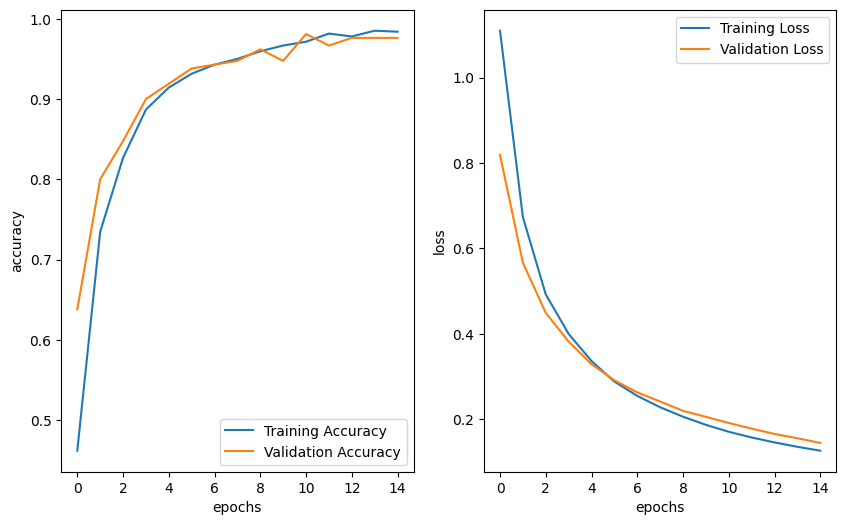

In [70]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history_service.history['accuracy'], label ='Training Accuracy')
plt.plot(history_service.history['val_accuracy'], label ='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_service.history['loss'], label ='Training Loss')
plt.plot(history_service.history['val_loss'], label ='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [182]:
fuel_result = model_fuel.predict(x_test_fuel).argmax(axis=1)
machine_result = model_machine.predict(x_test_machine).argmax(axis=1)
other_result = model_other.predict(x_test_other).argmax(axis=1)
part_result = model_part.predict(x_test_part).argmax(axis=1)
price_result = model_price.predict(x_test_price).argmax(axis=1)
service_result = model_service.predict(x_test_service).argmax(axis=1)

result_fuel = pd.DataFrame({
    'fuel_result': fuel_result,
    'Actual_fuel_result': y_test_fuel[:,]
})

result_machine = pd.DataFrame({
    'machine_result': machine_result,
    'Actual_machine_result': y_test_machine[:,]
})

result_other = pd.DataFrame({
    'other_result': other_result,
    'Actual_other_result': y_test_other[:,]
})

result_part = pd.DataFrame({
    'part_result': part_result,
    'Actual_part_result': y_test_part[:,]
})

result_price = pd.DataFrame({
    'price_result': price_result,
    'Actual_price_result': y_test_price[:,]
})

result_service = pd.DataFrame({
    'service_result': service_result,
    'Actual_service_result': y_test_service[:,]
})

print(result_fuel)
print(result_machine)
print(result_other)
print(result_part)
print(result_price)
print(result_service)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     fuel_result  Actual_fuel_result
0              0                   1
1              2                   2
2              2                   2
3              2                   2
4              2                   2
..           ...                 ...
205            1                   1
206            1                   1
207            2                   2
208            0                   0
209            0                   0

[210 rows x 2 columns]
     machine_result  Actual_machine_result
0                 1                      1
1                 2                      2
2                 2                      2
3                 2                      2
4                 2                      2
..              ...                    ...
205

In [187]:
def text_cleaning(text):
  text = dataclean(text)
  text = stem_text(text)
  text = process_text(text)
  return text

def transform(number):
  if number == 0:
    return 'Negative'
  elif number ==1:
    return 'Netral'
  else:
    return 'Positive'

kalimat = str(input('Masukan kalimatnya: '))

kalimat_bersih = np.array([text_cleaning(kalimat)])

fuel_result = model_fuel.predict(kalimat_bersih).argmax(axis=1)
machine_result = model_machine.predict(kalimat_bersih).argmax(axis=1)
other_result = model_other.predict(kalimat_bersih).argmax(axis=1)
part_result = model_part.predict(kalimat_bersih).argmax(axis=1)
price_result = model_price.predict(kalimat_bersih).argmax(axis=1)
service_result = model_service.predict(kalimat_bersih).argmax(axis=1)

print('Fuel Sentiment : ', transform(int(fuel_result)))
print('Machine Sentiment : ', transform(int(machine_result)))
print('Others Sentiment : ', transform(int(other_result)))
print('Parts Sentiment : ', transform(int(part_result)))
print('Price Sentiment : ', transform(int(price_result)))
print('Service Sentiment : ', transform(int(service_result)))


Masukan kalimatnya: toyota mesin bandel, irit bertenaga, tapi harganya mahal banget
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fuel Sentiment :  Positive
Machine Sentiment :  Positive
Others Sentiment :  Netral
Parts Sentiment :  Netral
Price Sentiment :  Negative
Service Sentiment :  Netral


<ipython-input-187-b069bdc0995f>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Fuel Sentiment : ', transform(int(fuel_result)))
<ipython-input-187-b069bdc0995f>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Machine Sentiment : ', transform(int(machine_result)))
<ipython-input-187-b069bdc0995f>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Others Sentiment : ', transform(int(other_result)))
<ipython-input-187-b069bdc0995f>:29: Deprec